In [130]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D, LSTM, Embedding
from tensorflow.keras.models import Model
tf.executing_eagerly()

True

In [131]:
X_train =  np.load('train_images.npy', allow_pickle=True)
y_train =  np.load('train_labels.npy', allow_pickle=True)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

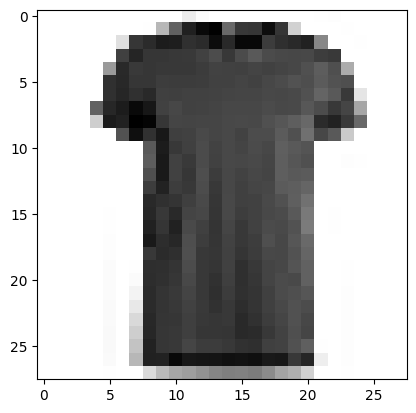

This is a T-shirt/top


In [132]:
# show image
data_idx = 17
plt.imshow(X_train[data_idx,:,:]/255, cmap='binary')
plt.show()
class_number = y_train[data_idx]
class_text = class_names[class_number]
print(f'This is a {class_text}')

In [133]:
# data prep
X_train = X_train/255
# X_train = X_train.reshape(-1, 784)

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
encoder = OneHotEncoder(sparse_output=False)

y_train_shaped = y_train.reshape(-1,1)

encoder.fit(y_train_shaped)
encoded = encoder.transform(y_train_shaped)

y_train_ohe = np.zeros((68000,10))
y_train_ohe[np.arange(68000), y_train] = 1

In [136]:

input_layer = Input(shape=(28,28))
ltsm_layer1 = LSTM(28, return_sequences=True)(input_layer)
lstm_layer2 = LSTM(10)(ltsm_layer1)
output_layer = Dense(10, activation='softmax')(lstm_layer2)

model_3 = Model(inputs=input_layer, outputs=output_layer)
model_3.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
print(X_train.size)
print(encoded.size)

53312000
680000


In [139]:
y_train = encoded

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
 
# X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [141]:
history = model_3.fit(X_train, y_train, batch_size=34, epochs=256, validation_data=(X_test,y_test))

Epoch 1/256
1600/1600 [==============================] - 20s 12ms/step - loss: 0.4898 - accuracy: 0.8251 - val_loss: 0.4968 - val_accuracy: 0.8241
Epoch 2/256
1600/1600 [==============================] - 20s 13ms/step - loss: 0.4471 - accuracy: 0.8401 - val_loss: 0.4389 - val_accuracy: 0.8462
Epoch 3/256
1600/1600 [==============================] - 21s 13ms/step - loss: 0.4213 - accuracy: 0.8490 - val_loss: 0.4371 - val_accuracy: 0.8440
Epoch 4/256
1600/1600 [==============================] - 21s 13ms/step - loss: 0.3985 - accuracy: 0.8559 - val_loss: 0.3940 - val_accuracy: 0.8570
Epoch 5/256
1600/1600 [==============================] - 21s 13ms/step - loss: 0.3822 - accuracy: 0.8611 - val_loss: 0.3854 - val_accuracy: 0.8648
Epoch 6/256
1600/1600 [==============================] - 21s 13ms/step - loss: 0.3680 - accuracy: 0.8671 - val_loss: 0.3678 - val_accuracy: 0.8687
Epoch 7/256
1600/1600 [==============================] - 21s 13ms/step - loss: 0.3551 - accuracy: 0.8702 - val_loss: 0

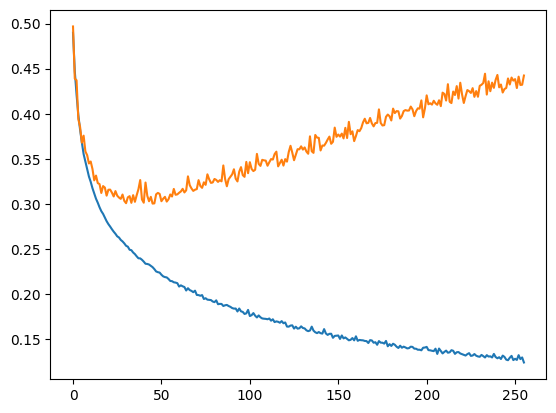

In [142]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

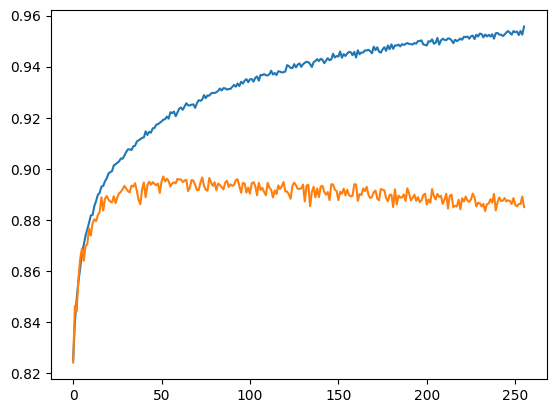

In [143]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [144]:
history.history["accuracy"]

[0.8251286745071411,
 0.8400735259056091,
 0.8490073680877686,
 0.8558639883995056,
 0.861139714717865,
 0.8671139478683472,
 0.8701654672622681,
 0.8737683892250061,
 0.8762132525444031,
 0.8788419365882874,
 0.8817095756530762,
 0.8819301724433899,
 0.8854227662086487,
 0.887371301651001,
 0.8898345828056335,
 0.8905698657035828,
 0.8929963111877441,
 0.8932720422744751,
 0.8950735330581665,
 0.8962132334709167,
 0.898161768913269,
 0.8986580967903137,
 0.8990808725357056,
 0.9013235569000244,
 0.9017831087112427,
 0.9023529291152954,
 0.9029228091239929,
 0.9040257334709167,
 0.9039338231086731,
 0.9052022099494934,
 0.9065625071525574,
 0.907610297203064,
 0.907610297203064,
 0.907334566116333,
 0.9088051319122314,
 0.9089889526367188,
 0.9106433987617493,
 0.9111580848693848,
 0.9115808606147766,
 0.9120771884918213,
 0.9122794270515442,
 0.9146690964698792,
 0.9132353067398071,
 0.9144852757453918,
 0.9141176342964172,
 0.915827214717865,
 0.9159559011459351,
 0.9172794222831726,

(array([  1.,   2.,   2.,   4.,   6.,  12.,  20.,  32.,  63., 114.]),
 array([0.82512867, 0.83818933, 0.85124999, 0.86431065, 0.87737131,
        0.89043197, 0.90349263, 0.91655329, 0.92961395, 0.94267461,
        0.95573527]),
 <BarContainer object of 10 artists>)

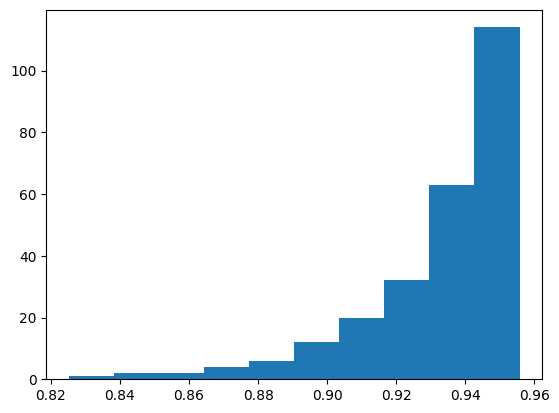

In [145]:
plt.hist(history.history["accuracy"])

In [ ]:
# prediction = model_3.predict(X_test)

In [ ]:
# predic validation data
X_validate = np.load('val_images.npy', allow_pickle=True)
# data prep
X_validate = X_validate/255
# my_prediction = np.array([9,0,0,3,...])

prediction = model_3.predict(X_validate)

In [ ]:
the_score = model_3.evaluate(X_test, y_test)

In [ ]:
the_score

In [ ]:
np.round(prediction[0, :], 2)

# Get the index of the maximum value in each row
argmaxed = np.argmax(prediction, axis=1)
argmaxed

In [ ]:
my_name = "Marius"
np.save(my_name+"_rnn_89.npy", argmaxed)